# IDSML Project By Group E:-  
#### Mahesh Somavarapu(650455)
#### Rajesh Maddineni(650440)
#### Kalyan Sabavath(650521)

# Aim:- 
#### The Aim of the project is to create a classification algorithm to predict membership of one specific of the seven classes.

# Importing Libraies 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sd
import random as rnd

# Reading the data

In [2]:
data=pd.read_csv("faultsFile.csv")

Getting to know data

In [3]:
data.head()    #Views the top 5 rows of the data

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   

   Maximum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
0                    108  ...             0.8182           -0.2913   
1                    123  ...             0.7931           -0.1756   
2                    125  ...             0.6667           -0.1228   
3                    126  ...             0.8444           -0.1568   
4                    126  ...             0.9338           -0.1992   

   SigmoidOfAreas  Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  \
0          0.5822       1          0         0       0          0      0   
1          0.2984       1          0         0       0          0      0   
2        215.0000       1          0         0       0          0      0   
3          0.5212       1          0         0       0          0      0   
4          1.0000       1          0         0       0          0      0   

   Other_Faults  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 34 columns]

In [4]:
data.tail()   #Views the last 5 rows of data

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
1936        249        277     325780     325796           273           54   
1937        144        175     340581     340598           287           44   
1938        145        174     386779     386794           292           40   
1939        137        170     422497     422528           419           97   
1940       1261       1281      87951      87967           103           26   

      Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
1936           22              35033                    119   
1937           24              34599                    112   
1938           22              37572                    120   
1939           47              52715                    117   
1940           22              11682                    101   

      Maximum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
1936                    141  ...            -0.4286            0.0026   
1937                    133  ...            -0.4516           -0.0582   
1938                    140  ...            -0.4828            0.0052   
1939                    140  ...            -0.0606           -0.0171   
1940                    133  ...            -0.2000           -0.1139   

      SigmoidOfAreas  Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  \
1936          0.7254       0          0         0       0          0      0   
1937          0.8173       0          0         0       0          0      0   
1938          0.7079       0          0         0       0          0      0   
1939          0.9919       0          0         0       0          0      0   
1940          0.5296       0          0         0       0          0      0   

      Other_Faults  
1936             1  
1937             1  
1938             1  
1939             1  
1940             1  

[5 rows x 34 columns]

In [5]:
data.describe()  #Gives the statistical overview of the data

X_Minimum    X_Maximum     Y_Minimum     Y_Maximum   Pixels_Areas  \
count  1941.000000  1941.000000  1.941000e+03  1.941000e+03    1941.000000   
mean    571.136012   617.964451  1.650685e+06  1.650739e+06    1893.878413   
std     520.690671   497.627410  1.774578e+06  1.774590e+06    5168.459560   
min       0.000000     4.000000  6.712000e+03  6.724000e+03       2.000000   
25%      51.000000   192.000000  4.712530e+05  4.712810e+05      84.000000   
50%     435.000000   467.000000  1.204128e+06  1.204136e+06     174.000000   
75%    1053.000000  1072.000000  2.183073e+06  2.183084e+06     822.000000   
max    1705.000000  1713.000000  1.298766e+07  1.298769e+07  152655.000000   

        X_Perimeter   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
count   1941.000000   1941.000000       1.941000e+03            1941.000000   
mean     111.855229     82.965997       2.063121e+05              84.548686   
std      301.209187    426.482879       5.122936e+05              32.134276   
min        2.000000      1.000000       2.500000e+02               0.000000   
25%       15.000000     13.000000       9.522000e+03              63.000000   
50%       26.000000     25.000000       1.920200e+04              90.000000   
75%       84.000000     83.000000       8.301100e+04             106.000000   
max    10449.000000  18152.000000       1.159141e+07             203.000000   

       Maximum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
count            1941.000000  ...        1941.000000       1941.000000   
mean              130.193715  ...          -1.961549        -15.216154   
std                18.690992  ...         116.165583         63.035912   
min                37.000000  ...        -991.000000       -885.000000   
25%               124.000000  ...          -0.333300         -0.229200   
50%               127.000000  ...           0.100000         -0.149700   
75%               140.000000  ...           0.524600         -0.074500   
max               253.000000  ...         937.000000        402.000000   

       SigmoidOfAreas       Pastry    Z_Scratch     K_Scatch       Stains  \
count     1941.000000  1941.000000  1941.000000  1941.000000  1941.000000   
mean        26.084368     0.081401     0.097888     0.201443     0.037094   
std        119.204964     0.273521     0.297239     0.401181     0.189042   
min          0.126200     0.000000     0.000000     0.000000     0.000000   
25%          0.258300     0.000000     0.000000     0.000000     0.000000   
50%          0.601500     0.000000     0.000000     0.000000     0.000000   
75%          1.000000     0.000000     0.000000     0.000000     0.000000   
max        999.000000     1.000000     1.000000     1.000000     1.000000   

         Dirtiness        Bumps  Other_Faults  
count  1941.000000  1941.000000   1941.000000  
mean      0.028336     0.207110      0.346728  
std       0.165973     0.405339      0.476051  
min       0.000000     0.000000      0.000000  
25%       0.000000     0.000000      0.000000  
50%       0.000000     0.000000      0.000000  
75%       0.000000     0.000000      1.000000  
max       1.000000     1.000000      1.000000  

[8 rows x 34 columns]

Checking for the Duplicate Values

In [6]:
data.loc[data.duplicated()]

Empty DataFrame
Columns: [X_Minimum, X_Maximum, Y_Minimum, Y_Maximum, Pixels_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity, Minimum_of_Luminosity, Maximum_of_Luminosity, Length_of_Conveyer, TypeOfSteel_A300, TypeOfSteel_A400, Steel_Plate_Thickness, Edges_Index, Empty_Index, Square_Index, Outside_X_Index, Edges_X_Index, Edges_Y_Index, Outside_Global_Index, LogOfAreas, Log_X_Index, Log_Y_Index, Orientation_Index, Luminosity_Index, SigmoidOfAreas, Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults]
Index: []

[0 rows x 34 columns]

In [7]:
df=data

Correlation of the data

In [8]:
data.corr()

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  \
X_Minimum               1.000000   0.988314   0.041821   0.041807   
X_Maximum               0.988314   1.000000   0.052147   0.052135   
Y_Minimum               0.041821   0.052147   1.000000   1.000000   
Y_Maximum               0.041807   0.052135   1.000000   1.000000   
Pixels_Areas           -0.307322  -0.225399   0.017670   0.017840   
X_Perimeter            -0.258937  -0.186326   0.023843   0.024038   
Y_Perimeter            -0.118757  -0.090138   0.024150   0.024380   
Sum_of_Luminosity      -0.339045  -0.247052   0.007362   0.007499   
Minimum_of_Luminosity   0.237637   0.168649  -0.065703  -0.065733   
Maximum_of_Luminosity  -0.075554  -0.062392  -0.067785  -0.067776   
Length_of_Conveyer      0.316662   0.299390  -0.049211  -0.049219   
TypeOfSteel_A300        0.144319   0.112009   0.075164   0.075151   
TypeOfSteel_A400       -0.144319  -0.112009  -0.075164  -0.075151   
Steel_Plate_Thickness   0.136625   0.106119  -0.207640  -0.207644   
Edges_Index             0.074708   0.065901   0.001687   0.001684   
Empty_Index            -0.039008  -0.031889  -0.035747  -0.035746   
Square_Index           -0.065913  -0.057448  -0.038673  -0.038672   
Outside_X_Index        -0.097013  -0.073651  -0.014820  -0.014815   
Edges_X_Index          -0.041754  -0.035092   0.023330   0.023328   
Edges_Y_Index          -0.063941  -0.064690   0.025130   0.025130   
Outside_Global_Index    0.147282   0.099253  -0.062911  -0.062901   
LogOfAreas             -0.089967  -0.066808   0.018996   0.019000   
Log_X_Index            -0.192513  -0.148617   0.031062   0.031066   
Log_Y_Index             0.004061   0.005341   0.029347   0.029347   
Orientation_Index       0.031132   0.012299   0.023830   0.023832   
Luminosity_Index       -0.040740  -0.039378  -0.014915  -0.014913   
SigmoidOfAreas          0.028819   0.018850   0.048558   0.048555   
Pastry                  0.134956   0.119814   0.036488   0.036488   
Z_Scratch              -0.228960  -0.258178  -0.063327  -0.063329   
K_Scatch               -0.419264  -0.336084  -0.000420  -0.000397   
Stains                  0.073740   0.061471  -0.066601  -0.066606   
Dirtiness               0.103924   0.096523   0.064262   0.064262   
Bumps                   0.221296   0.201704   0.126121   0.126110   
Other_Faults            0.164804   0.145783  -0.084415  -0.084422   

                       Pixels_Areas  X_Perimeter  Y_Perimeter  \
X_Minimum                 -0.307322    -0.258937    -0.118757   
X_Maximum                 -0.225399    -0.186326    -0.090138   
Y_Minimum                  0.017670     0.023843     0.024150   
Y_Maximum                  0.017840     0.024038     0.024380   
Pixels_Areas               1.000000     0.966644     0.827199   
X_Perimeter                0.966644     1.000000     0.912436   
Y_Perimeter                0.827199     0.912436     1.000000   
Sum_of_Luminosity          0.978952     0.912956     0.704876   
Minimum_of_Luminosity     -0.497204    -0.400427    -0.213758   
Maximum_of_Luminosity      0.110063     0.111363     0.061809   
Length_of_Conveyer        -0.155853    -0.134240    -0.063825   
TypeOfSteel_A300          -0.235591    -0.189250    -0.095154   
TypeOfSteel_A400           0.235591     0.189250     0.095154   
Steel_Plate_Thickness     -0.183735    -0.147712    -0.058889   
Edges_Index               -0.063547    -0.054016    -0.026349   
Empty_Index                0.049279     0.046524     0.016931   
Square_Index               0.072503     0.064632     0.021300   
Outside_X_Index            0.172106     0.152493     0.061650   
Edges_X_Index              0.016917     0.006985    -0.003756   
Edges_Y_Index              0.007646     0.003834     0.002068   
Outside_Global_Index      -0.109655    -0.079106     0.013438   
LogOfAreas                 0.122737     0.110220     0.041973   
Log_X_Index                0.229367     0.169730     0.056882   
Log_Y_Index                0.027309     0.03010

### Dividing the data in to features and faults
#### The features consists the independent variables and the faults contains the dependent variables(i.e. membership of the specific class)

In [9]:
features=data.iloc[:,:27]

In [10]:
faults=data.iloc[:,-7:]

Checking for the null values

In [11]:
features.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
dtype: int64

In [12]:
faults.isnull().sum()

Pastry          0
Z_Scratch       0
K_Scatch        0
Stains          0
Dirtiness       0
Bumps           0
Other_Faults    0
dtype: int64

# Scaling

The scaling is performed to bring the range of all variables to the same interval

In [13]:
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
data1=s.fit_transform(data)
data1=pd.DataFrame(data1,columns=data.columns)
features=data1.columns[:-7]
target=data1.columns[27:]
X=data1[features]        #X consists of the values of the features
Y=data1[target]          #Y consists of the values of the faults(membership class) 

In [14]:
X.corr()

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  \
X_Minimum               1.000000   0.988314   0.041821   0.041807   
X_Maximum               0.988314   1.000000   0.052147   0.052135   
Y_Minimum               0.041821   0.052147   1.000000   1.000000   
Y_Maximum               0.041807   0.052135   1.000000   1.000000   
Pixels_Areas           -0.307322  -0.225399   0.017670   0.017840   
X_Perimeter            -0.258937  -0.186326   0.023843   0.024038   
Y_Perimeter            -0.118757  -0.090138   0.024150   0.024380   
Sum_of_Luminosity      -0.339045  -0.247052   0.007362   0.007499   
Minimum_of_Luminosity   0.237637   0.168649  -0.065703  -0.065733   
Maximum_of_Luminosity  -0.075554  -0.062392  -0.067785  -0.067776   
Length_of_Conveyer      0.316662   0.299390  -0.049211  -0.049219   
TypeOfSteel_A300        0.144319   0.112009   0.075164   0.075151   
TypeOfSteel_A400       -0.144319  -0.112009  -0.075164  -0.075151   
Steel_Plate_Thickness   0.136625   0.106119  -0.207640  -0.207644   
Edges_Index             0.074708   0.065901   0.001687   0.001684   
Empty_Index            -0.039008  -0.031889  -0.035747  -0.035746   
Square_Index           -0.065913  -0.057448  -0.038673  -0.038672   
Outside_X_Index        -0.097013  -0.073651  -0.014820  -0.014815   
Edges_X_Index          -0.041754  -0.035092   0.023330   0.023328   
Edges_Y_Index          -0.063941  -0.064690   0.025130   0.025130   
Outside_Global_Index    0.147282   0.099253  -0.062911  -0.062901   
LogOfAreas             -0.089967  -0.066808   0.018996   0.019000   
Log_X_Index            -0.192513  -0.148617   0.031062   0.031066   
Log_Y_Index             0.004061   0.005341   0.029347   0.029347   
Orientation_Index       0.031132   0.012299   0.023830   0.023832   
Luminosity_Index       -0.040740  -0.039378  -0.014915  -0.014913   
SigmoidOfAreas          0.028819   0.018850   0.048558   0.048555   

                       Pixels_Areas  X_Perimeter  Y_Perimeter  \
X_Minimum                 -0.307322    -0.258937    -0.118757   
X_Maximum                 -0.225399    -0.186326    -0.090138   
Y_Minimum                  0.017670     0.023843     0.024150   
Y_Maximum                  0.017840     0.024038     0.024380   
Pixels_Areas               1.000000     0.966644     0.827199   
X_Perimeter                0.966644     1.000000     0.912436   
Y_Perimeter                0.827199     0.912436     1.000000   
Sum_of_Luminosity          0.978952     0.912956     0.704876   
Minimum_of_Luminosity     -0.497204    -0.400427    -0.213758   
Maximum_of_Luminosity      0.110063     0.111363     0.061809   
Length_of_Conveyer        -0.155853    -0.134240    -0.063825   
TypeOfSteel_A300          -0.235591    -0.189250    -0.095154   
TypeOfSteel_A400           0.235591     0.189250     0.095154   
Steel_Plate_Thickness     -0.183735    -0.147712    -0.058889   
Edges_Index               -0.063547    -0.054016    -0.026349   
Empty_Index                0.049279     0.046524     0.016931   
Square_Index               0.072503     0.064632     0.021300   
Outside_X_Index            0.172106     0.152493     0.061650   
Edges_X_Index              0.016917     0.006985    -0.003756   
Edges_Y_Index              0.007646     0.003834     0.002068   
Outside_Global_Index      -0.109655    -0.079106     0.013438   
LogOfAreas                 0.122737     0.110220     0.041973   
Log_X_Index                0.229367     0.169730     0.056882   
Log_Y_Index                0.027309     0.030101     0.012210   
Orientation_Index         -0.044810    -0.037036    -0.001651   
Luminosity_Index           0.009580     0.012351     0.007346   
SigmoidOfAreas            -0.065950    -0.054712    -0.025991   

                       Sum_of_Luminosity  Minimum_of_Luminosity  \
X_Minimum                      -0.339045               0.237637   
X_Maximum                      -0.247052               0.168649   
Y_Minimum                       0.007362              -0.065703   
Y

In [15]:
Y.corr()

Pastry  Z_Scratch  K_Scatch    Stains  Dirtiness     Bumps  \
Pastry        1.000000  -0.098059 -0.149512 -0.058427  -0.050835 -0.152141   
Z_Scratch    -0.098059   1.000000 -0.165446 -0.064654  -0.056253 -0.168356   
K_Scatch     -0.149512  -0.165446  1.000000 -0.098579  -0.085770 -0.256694   
Stains       -0.058427  -0.064654 -0.098579  1.000000  -0.033518 -0.100313   
Dirtiness    -0.050835  -0.056253 -0.085770 -0.033518   1.000000 -0.087278   
Bumps        -0.152141  -0.168356 -0.256694 -0.100313  -0.087278  1.000000   
Other_Faults -0.216871  -0.239984 -0.365907 -0.142991  -0.124411 -0.372342   

              Other_Faults  
Pastry           -0.216871  
Z_Scratch        -0.239984  
K_Scatch         -0.365907  
Stains           -0.142991  
Dirtiness        -0.124411  
Bumps            -0.372342  
Other_Faults      1.000000

# Spliting the data

the total data is split in to 70% of training set and 30% of testing set

In [16]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=12) 


In [17]:
print('training set of X:',Xtrain.shape[0])
print('training set of y:',Ytrain.shape[0])
print('test set of X:',Xtest.shape[0])
print('test set of y:',Ytest.shape[0])

training set of X: 1358
training set of y: 1358
test set of X: 583
test set of y: 583


Pair plot

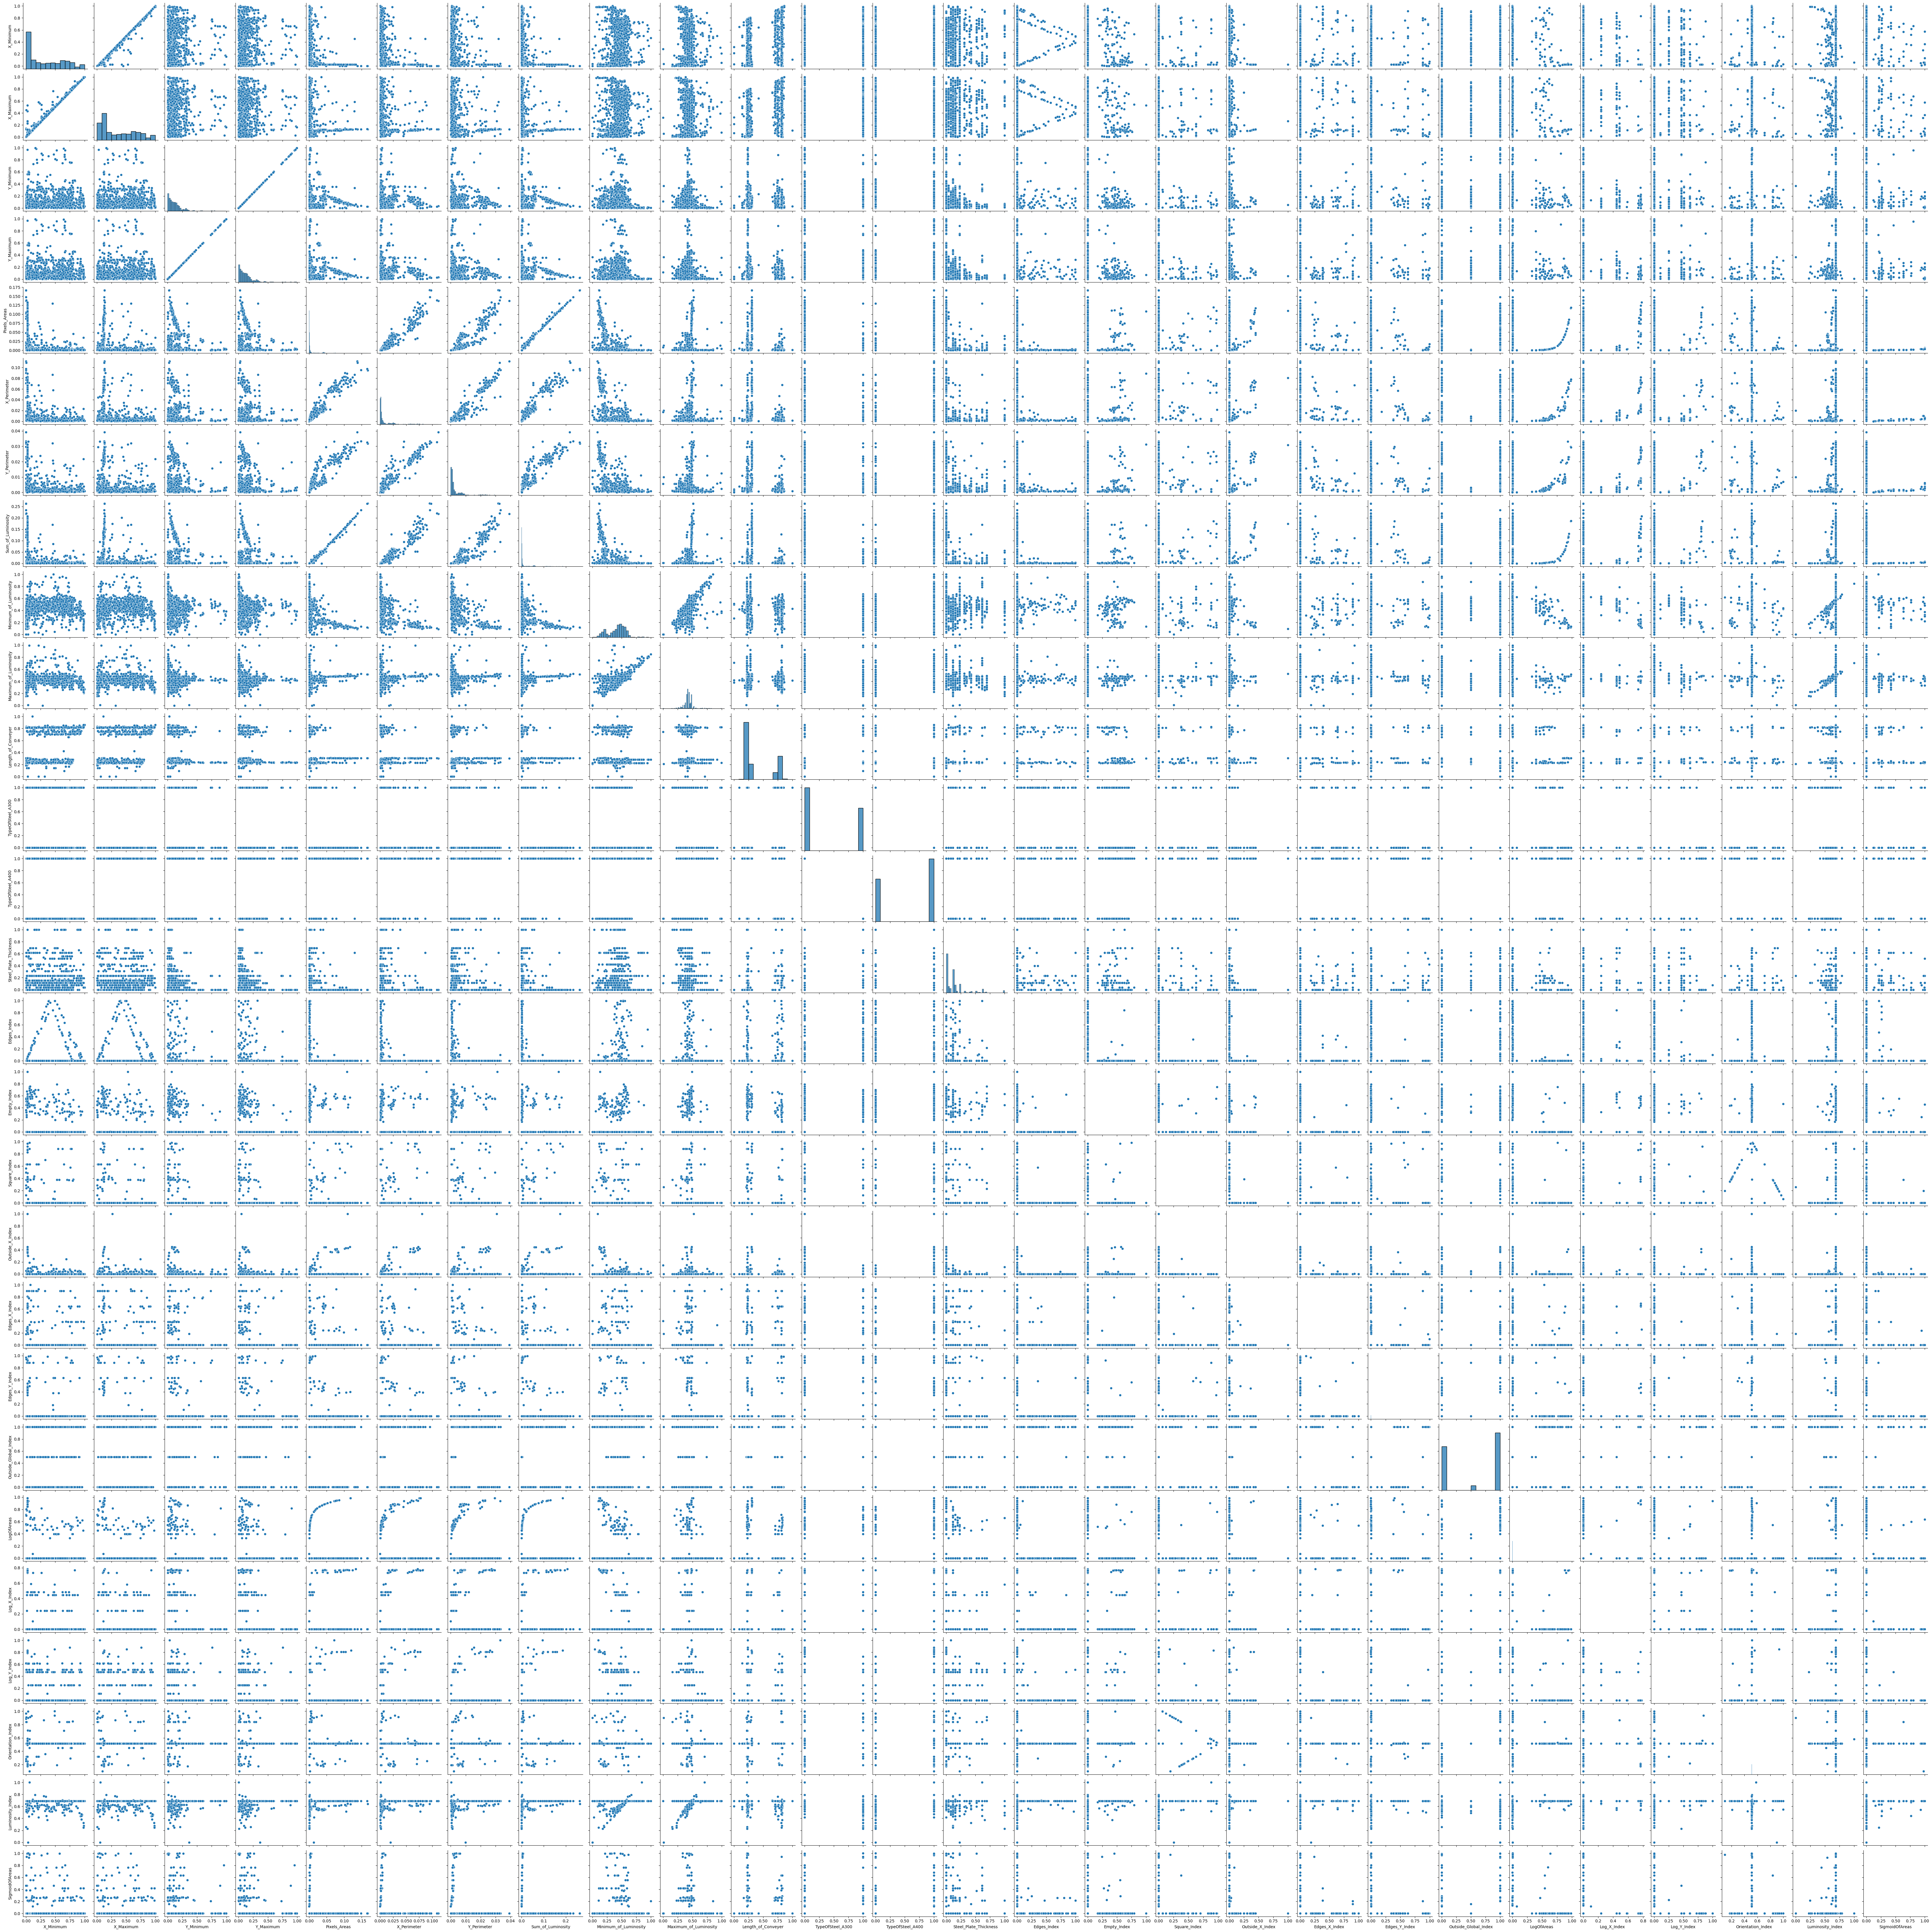

In [49]:
sns.pairplot(Xtrain)

<AxesSubplot:>

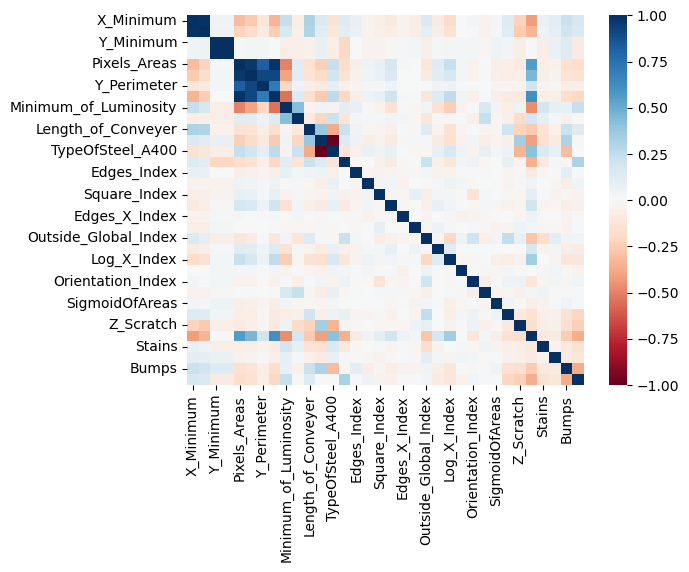

In [52]:
sns.heatmap(data.corr(),cmap='RdBu')

In [18]:
print(type(X),type(Xtrain))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [19]:
print(type(Y),type(Ytrain))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


# Regression

In [20]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(Xtrain,Ytrain)

LinearRegression()

In [21]:
lm.feature_names_in_

array(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity',
       'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400',
       'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index',
       'Square_Index', 'Outside_X_Index', 'Edges_X_Index',
       'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index',
       'Luminosity_Index', 'SigmoidOfAreas'], dtype=object)

In [22]:
lm.coef_

array([[-3.21413584e-01,  3.65677717e-01, -3.85946984e+03,
         3.85959794e+03, -6.33630264e+00, -8.85095867e+00,
         1.42420951e+01,  3.72873746e+00, -4.15073440e-01,
         2.16623616e-01,  2.20935786e-01, -4.59760800e-02,
         4.59764705e-02, -1.69164426e-02, -6.91506990e-02,
        -7.40850498e-03,  9.73824172e-02, -8.11093961e-02,
         3.25649372e-02, -3.44377750e-02,  9.84495885e-02,
         3.74109208e-02, -2.39792995e-02,  2.97075162e-02,
         9.31822442e-02,  1.26601612e-01,  7.72082632e-02],
       [-5.96446812e-02, -1.87408790e-01, -1.04191655e+04,
         1.04189248e+04, -8.28927967e+00,  3.08650611e+00,
        -5.69387739e+00,  4.12036591e+00,  2.97500357e-01,
        -7.86763746e-01, -3.86573046e-01,  1.39455539e-01,
        -1.39454484e-01, -1.56546772e-01, -6.82132187e-02,
        -1.27375578e-02, -3.78750476e-02, -8.97737666e-03,
         1.82903344e-02,  4.94307263e-02,  4.62813501e-02,
         3.52416103e-02, -1.11121504e-02,  2.32507344e-

In [23]:
print('min:',Xtest.min(),'max:',Xtest.max())

min: X_Minimum                0.000000
X_Maximum                0.000585
Y_Minimum                0.000194
Y_Maximum                0.000194
Pixels_Areas             0.000000
X_Perimeter              0.000000
Y_Perimeter              0.000000
Sum_of_Luminosity        0.000000
Minimum_of_Luminosity    0.000000
Maximum_of_Luminosity    0.157407
Length_of_Conveyer       0.142857
TypeOfSteel_A300         0.000000
TypeOfSteel_A400         0.000000
Steel_Plate_Thickness    0.000000
Edges_Index              0.000000
Empty_Index              0.000000
Square_Index             0.000000
Outside_X_Index          0.000000
Edges_X_Index            0.000000
Edges_Y_Index            0.000000
Outside_Global_Index     0.000000
LogOfAreas               0.000000
Log_X_Index              0.000000
Log_Y_Index              0.000000
Orientation_Index        0.000000
Luminosity_Index         0.233100
SigmoidOfAreas           0.000000
dtype: float64 max: X_Minimum                0.990029
X_Maximum              

In [24]:
print('testScaled: min:',Xtest.min(),'max:',Xtest.max())
print('XTrain (scaled): min:',Xtrain.min(),'max:',Xtrain.max())

testScaled: min: X_Minimum                0.000000
X_Maximum                0.000585
Y_Minimum                0.000194
Y_Maximum                0.000194
Pixels_Areas             0.000000
X_Perimeter              0.000000
Y_Perimeter              0.000000
Sum_of_Luminosity        0.000000
Minimum_of_Luminosity    0.000000
Maximum_of_Luminosity    0.157407
Length_of_Conveyer       0.142857
TypeOfSteel_A300         0.000000
TypeOfSteel_A400         0.000000
Steel_Plate_Thickness    0.000000
Edges_Index              0.000000
Empty_Index              0.000000
Square_Index             0.000000
Outside_X_Index          0.000000
Edges_X_Index            0.000000
Edges_Y_Index            0.000000
Outside_Global_Index     0.000000
LogOfAreas               0.000000
Log_X_Index              0.000000
Log_Y_Index              0.000000
Orientation_Index        0.000000
Luminosity_Index         0.233100
SigmoidOfAreas           0.000000
dtype: float64 max: X_Minimum                0.990029
X_Maximum  

In [25]:
print('shape Xtest',Xtest.shape)
print('shape yTest',Ytest.shape)

shape Xtest (583, 27)
shape yTest (583, 7)


In [26]:
yPredicted=lm.predict(Xtest)
print(yPredicted)
yPredicted.shape

[[-1.55761288e-01  1.60257597e-02  1.14943559e+00 ... -3.28527186e-02
  -8.46652395e-03  4.20615490e-04]
 [ 1.44235720e-01  3.73232587e-02 -8.09213448e-03 ...  6.46642884e-02
   7.15196240e-02  6.17545805e-01]
 [-4.83602499e-02  1.55607343e-01  2.64334591e-01 ...  2.01497306e-02
   6.83254433e-02  3.82556329e-01]
 ...
 [ 2.03784076e-02  7.28426906e-02  6.71889653e-01 ...  6.62936460e-03
   1.03983836e-01  1.64181922e-01]
 [ 2.68603952e-01 -3.10408366e-01 -2.11879145e-01 ...  6.11546182e-02
   9.32901594e-02  1.11180990e+00]
 [ 1.09451658e-01  5.72064030e-01  1.87403610e-01 ...  6.55744701e-02
  -2.02388802e-01  3.17472900e-01]]


(583, 7)

In [27]:
print(Ytest)

      Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults
443      0.0        0.0       1.0     0.0        0.0    0.0           0.0
813      0.0        0.0       0.0     0.0        1.0    0.0           0.0
1929     0.0        0.0       0.0     0.0        0.0    0.0           1.0
1024     0.0        0.0       0.0     0.0        0.0    1.0           0.0
465      0.0        0.0       1.0     0.0        0.0    0.0           0.0
...      ...        ...       ...     ...        ...    ...           ...
1322     0.0        0.0       0.0     0.0        0.0    0.0           1.0
1697     0.0        0.0       0.0     0.0        0.0    0.0           1.0
506      0.0        0.0       1.0     0.0        0.0    0.0           0.0
1481     0.0        0.0       0.0     0.0        0.0    0.0           1.0
217      0.0        1.0       0.0     0.0        0.0    0.0           0.0

[583 rows x 7 columns]


### Comparing the predicted and actual data and plotting the errors

In [28]:
errors=Ytest-yPredicted

print (errors)

        Pastry  Z_Scratch  K_Scatch    Stains  Dirtiness     Bumps  \
443   0.155761  -0.016026 -0.149436 -0.031199   0.032853  0.008467   
813  -0.144236  -0.037323  0.008092 -0.072803   0.935336 -0.071520   
1929  0.048360  -0.155607 -0.264335 -0.157387  -0.020150 -0.068325   
1024 -0.134643  -0.185693  0.063771  0.082661  -0.030513  0.506358   
465   0.038785   0.041716  0.018482 -0.071895   0.025236 -0.036089   
...        ...        ...       ...       ...        ...       ...   
1322 -0.092682  -0.075304 -0.119561 -0.098861  -0.080209 -0.159264   
1697 -0.098750  -0.187028  0.033314 -0.023965  -0.018279  0.107460   
506  -0.020378  -0.072843  0.328110  0.039906  -0.006629 -0.103984   
1481 -0.268604   0.310408  0.211879  0.012571  -0.061155 -0.093290   
217  -0.109452   0.427936 -0.187404  0.049578  -0.065574  0.202389   

      Other_Faults  
443      -0.000421  
813      -0.617546  
1929      0.617444  
1024     -0.301940  
465      -0.016236  
...            ...  
1322      0.

{'whiskers': [<matplotlib.lines.Line2D at 0x20f79989d00>,
 'caps': [<matplotlib.lines.Line2D at 0x20f799ac2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20f79989a30>,
 'medians': [<matplotlib.lines.Line2D at 0x20f799ac880>,
 'fliers': [<matplotlib.lines.Line2D at 0x20f799acb50>,
 'means': []}

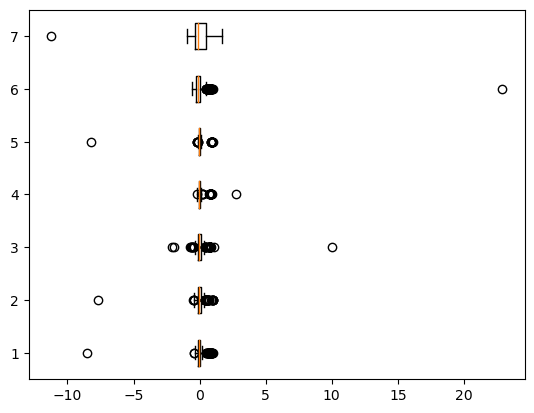

In [29]:
plt.boxplot(errors,vert=False)

### Plotting the predicted data

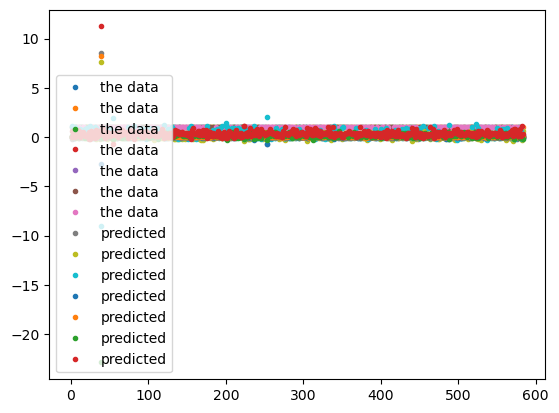

In [53]:
xNumbers=list(range(1,len(Ytest)+1))
plt.plot(xNumbers,Ytest,'.',label='the data')
plt.plot(xNumbers,yPredicted,'.',label='predicted')
plt.legend()

In [30]:
r_sq=lm.score(Xtrain,Ytrain)
print({r_sq})

{0.2595554277341371}


# Decision tree

In [31]:
from sklearn import tree

In [32]:
classif = tree.DecisionTreeClassifier()

In [33]:
classif = classif.fit(Xtrain,Ytrain)

In [34]:
theTree=tree.export_text(classif)
print(theTree)

|--- feature_4 <= 0.02
|   |--- feature_4 <= 0.00
|   |   |--- feature_13 <= 0.13
|   |   |   |--- feature_23 <= 0.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_23 >  0.00
|   |   |   |   |--- class: 0
|   |   |--- feature_13 >  0.13
|   |   |   |--- feature_17 <= 0.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_17 >  0.00
|   |   |   |   |--- class: 0
|   |--- feature_4 >  0.00
|   |   |--- feature_10 <= 0.23
|   |   |   |--- feature_11 <= 0.50
|   |   |   |   |--- feature_13 <= 0.08
|   |   |   |   |   |--- feature_10 <= 0.18
|   |   |   |   |   |   |--- feature_15 <= 0.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_15 >  0.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_10 >  0.18
|   |   |   |   |   |   |--- feature_24 <= 0.51
|   |   |   |   |   |   |   |--- feature_1 <= 0.31
|   |   |   |   |   |   |   |   |--- feature_24 <= 0.51
|   |   |   |   |   |   |   |   |   |--- feature_14 <= 0.00
|   

Text(0.5, 0.98, 'Decision tree')

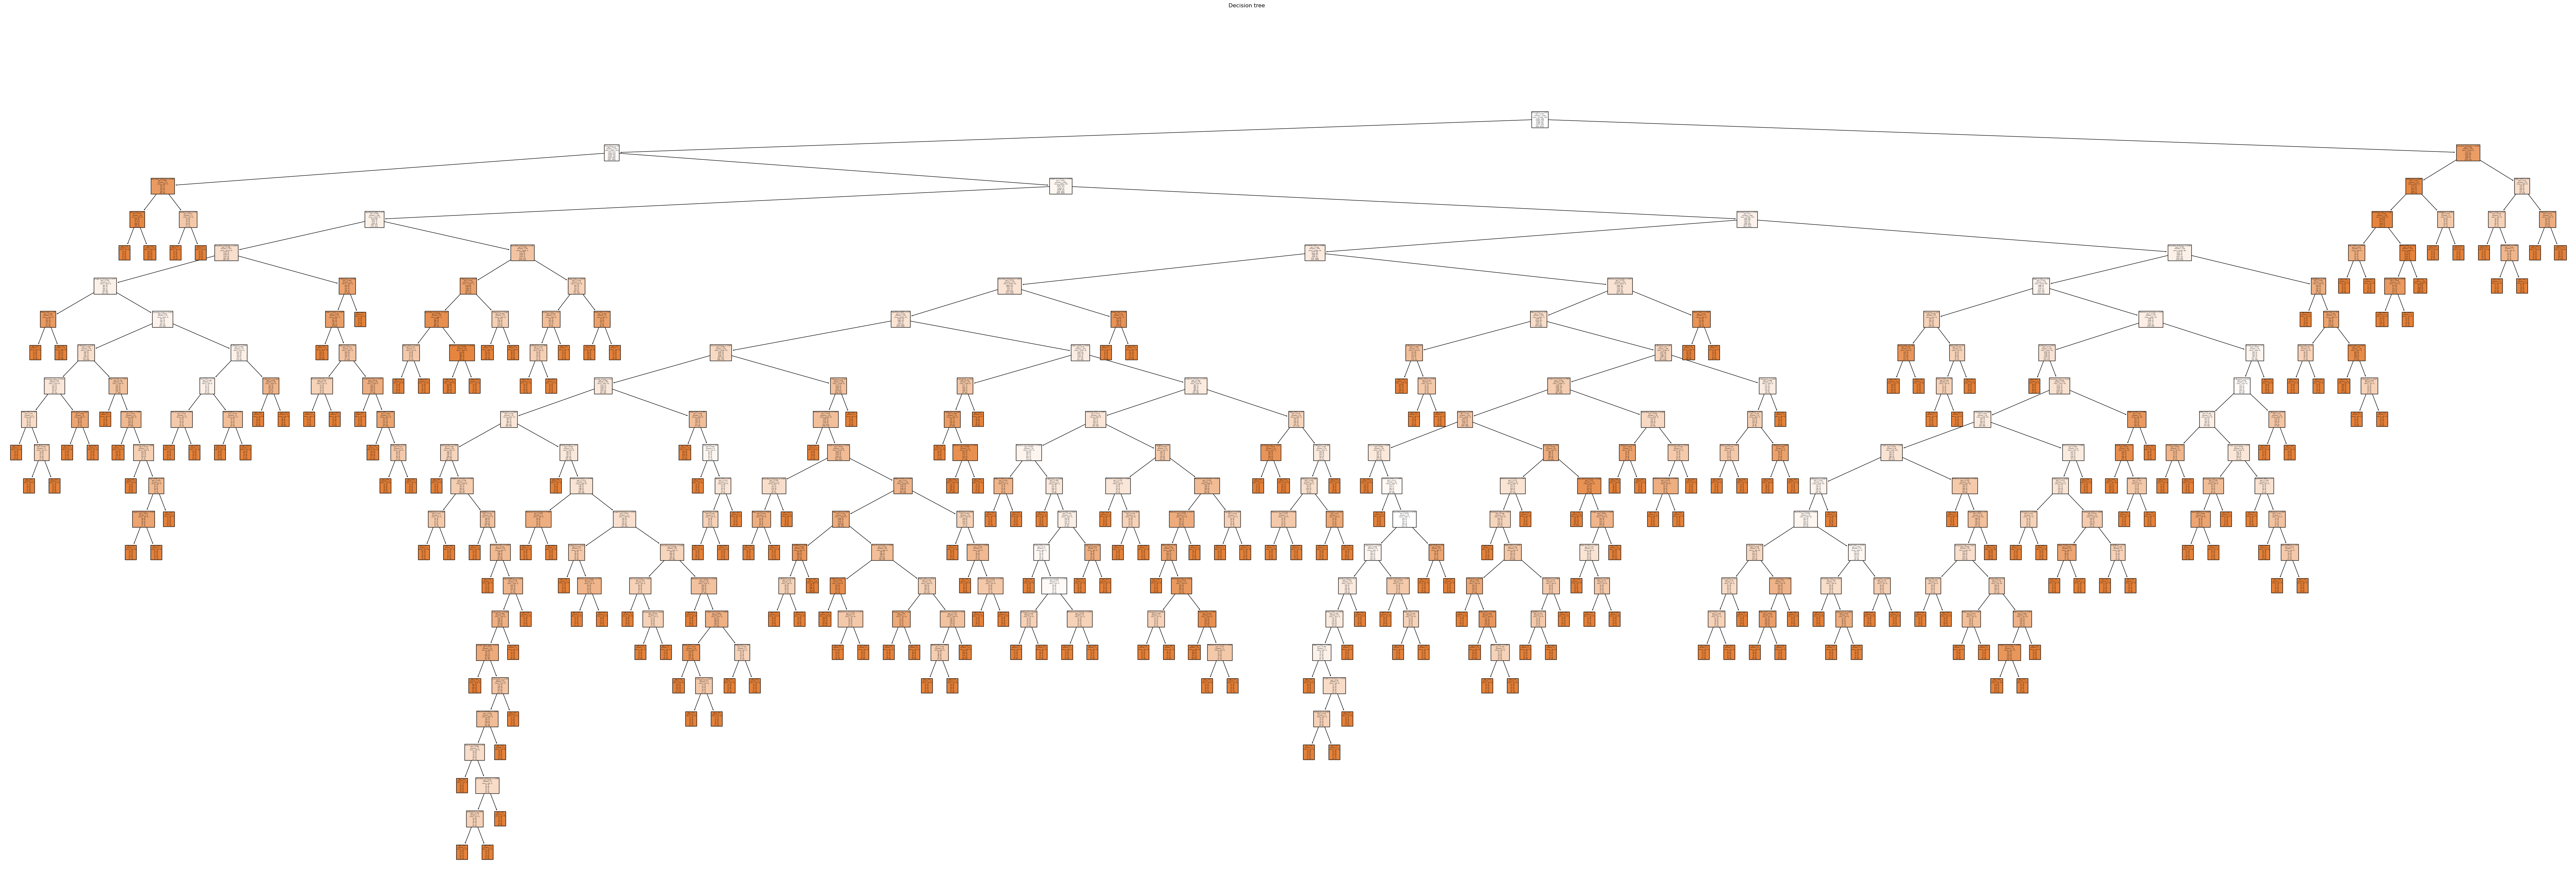

In [35]:
fig=plt.figure(figsize = (100,30))
tree.plot_tree(classif,feature_names=['X_Minimum','X_Maximum','Y_Minimum','Y_Maximum','Pixels_Areas','X_Perimeter','Y_Perimeter','Sum_of_Luminosity','Minimum_of_Luminosity','Maximum_of_Luminosity','Length_of_Conveyer','TypeOfSteel_A300','TypeOfSteel_A400','Steel_Plate_Thickness','Edges_Index','Empty_Index','Square_Index','Outside_X_Index','Edges_X_Index','Edges_Y_Index','Outside_Global_Index'
                                      ,'LogOfAreas','Log_X_Index','Log_Y_Index','Orientation_Index','Luminosity_Index','SigmoidOfAreas'], class_names=['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults'], filled=True)# here we plot the tree
fig.suptitle("Decision tree") # this is the title for the figure


In [36]:
classif.score(Xtrain,Ytrain)

1.0

The Score indicates the accuracy of the fit as the score is 1 it is a perfect fit.

#### From the Decision Tree we have obtained an accuracy of 98%.

### Variable Influence factor

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
vifList=[]
dfAsNumpy=Xtrain.values
# for all columns
for c in range(Xtrain.shape[1]):
    vifList.append(variance_inflation_factor(dfAsNumpy,c))
vifArray=np.array(vifList)
vifArray=vifArray.round(2)

# create an empty data frame
vif = pd.DataFrame()

# create a column features with column names    
vif['Features'] = Xtrain.columns
# create a column VIF with the calculated values
vif['VIF']=vifArray
# sort the data frame in descending order
vif = vif.sort_values(by = "VIF", ascending = False)

print(vif)

                 Features           VIF
2               Y_Minimum  1.934665e+10
3               Y_Maximum  1.934661e+10
4            Pixels_Areas  2.160500e+02
0               X_Minimum  2.100800e+02
7       Sum_of_Luminosity  1.978900e+02
1               X_Maximum  1.908800e+02
12       TypeOfSteel_A400  1.829900e+02
11       TypeOfSteel_A300  1.223900e+02
6             Y_Perimeter  1.080800e+02
5             X_Perimeter  6.497000e+01
8   Minimum_of_Luminosity  3.430000e+00
9   Maximum_of_Luminosity  2.040000e+00
20   Outside_Global_Index  1.430000e+00
10     Length_of_Conveyer  1.420000e+00
22            Log_X_Index  1.240000e+00
13  Steel_Plate_Thickness  1.230000e+00
17        Outside_X_Index  1.110000e+00
24      Orientation_Index  1.090000e+00
25       Luminosity_Index  1.090000e+00
16           Square_Index  1.070000e+00
21             LogOfAreas  1.070000e+00
19          Edges_Y_Index  1.040000e+00
15            Empty_Index  1.040000e+00
23            Log_Y_Index  1.030000e+00


The Variable influence factor helps us to identify the features which has higher linear correlation. Depending on which we can eliminate the features to make it less complicated.

# Support Vector Classifier(SVC)

In [39]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

from sklearn import svm
from sklearn.svm import SVC

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

In [40]:
clf=svm.SVC(kernel="poly",decision_function_shape='ovr')

In [41]:
y=data[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']]

In [42]:
ycombined=y.idxmax(axis=1)

In [43]:
ycombined

0             Pastry
1             Pastry
2             Pastry
3             Pastry
4             Pastry
            ...     
1936    Other_Faults
1937    Other_Faults
1938    Other_Faults
1939    Other_Faults
1940    Other_Faults
Length: 1941, dtype: object

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,ycombined,test_size = 0.3, random_state=0)

In [45]:
clf.fit(X_train, y_train)

SVC(kernel='poly')

In [46]:
print("accuracy:",clf.score(X_train,y_train))

accuracy: 0.6745213549337261


In [47]:
y_pred=clf.predict(X_test)

In [48]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       Bumps       0.54      0.57      0.55       120
   Dirtiness       0.00      0.00      0.00        13
    K_Scatch       0.96      0.84      0.90       122
Other_Faults       0.51      0.69      0.59       193
      Pastry       0.79      0.22      0.34        51
      Stains       0.00      0.00      0.00        23
   Z_Scratch       0.78      0.92      0.84        61

    accuracy                           0.64       583
   macro avg       0.51      0.46      0.46       583
weighted avg       0.63      0.64      0.61       583



#### From the support vector classification model we have obtained an accuracy of 67.45%.

## Results And Discuission
From the linear regression we have obtained the R² as 0.2595554277341371 and from the Decission tree we have obtained an accuracy of 98% and from the SVC we have obtained an accuracy of 67.45%.

By comparing the accuracy of both the classification models Decision Tree is better in prediction the data than SVC.

# Summary

Initially we have loaded the given 'faultsFile.csv' data and have performed the preprocessing and have divided the data as features(contains the indipendent variables) and faults(contains the membership classes) have checked for the null values if any present and have checked for the duplicate values in the data. Then we have split the data into training and testing sets in the ratio of 70%-30%.

First, we have performed the linear regression and have we have obtained the R² as 0.2595554277341371 which tells us the accuracy in predicting output.

Next, we have implemented the Decission Tree Classification. We have obtained an accuracy of 98% and the score of 1. The score represents the Accuracy of the fit as the score is 1 it is an accurate fit.

And also we have performed the SVC and have obtained an accuracy of 67.45%.

From the accuracy we can conclude that Decission tree is more accurate in predicting the future input.